In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Create trajectory utils methods

In [3]:
# Generate 2d zig_zag path
def generate_zig_zag_path(x_start, y_start, n_points, x_d): 
    
    pts = [(x_start, y_start)]
    for i in range(0, n_points):
        if i > 0:
            pt_ = (x_start+i*x_d, (-1)**i*y_start)
            pts.append(pt_)
    return np.array(pts)


def Linear_waypoints(ps, pg, n):
    
    x = np.linspace(ps[0], pg[0], n)
    y = np.linspace(ps[1], pg[1], n)
    z = np.linspace(ps[2], pg[2], n)

    return np.stack((x, y, z), axis=-1)
        
def cast2np(x): 
    return np.array(x)

def parabolic_path(start_point, end_point, height, N, yaw_angle):
    # Extract the coordinates from the input tuples
    x1, y1 = start_point
    x2, y2 = end_point

    # Calculate the vertex (midpoint in x, height from start point in y)
    xv = (x1 + x2) / 2
    yv = y1 + height

    # Set up the system of linear equations
    # Equation 1: y1 = a*x1^2 + b*x1 + c
    # Equation 2: y2 = a*x2^2 + b*x2 + c
    # Equation 3: yv = a*xv^2 + b*xv + c
    A = np.array([
        [x1**2, x1, 1],
        [x2**2, x2, 1],
        [xv**2, xv, 1]
    ])
    B = np.array([y1, y2, yv])

    # Solve the system of equations to find a, b, c
    a, b, c = np.linalg.solve(A, B)
    
    
    # Generate N points along the parabola
    x_points = np.linspace(x1, x2, N)* np.sin(np.radians(yaw_angle))
    y_points = (a * x_points**2 + b * x_points + c)#*np.cos(np.radians(yaw_angle))

    return x_points, y_points

def generate_circular_path(start_pose, radius, num_points=50):
    """
    Generates a circular path from a starting pose.
    
    Parameters:
    - start_pose: Tuple of (x, y, theta) representing the starting position and orientation of the robot.
    - radius: The radius of the circular path.
    - num_points: Number of points to generate on the circular path.
    
    Returns:
    - List of (x, y) tuples representing the points on the circular path.
    """
    # TODO: Make more robust conversion at some point in time
    x_start = start_pose[0]
    y_start = start_pose[1]
    z_start = start_pose[2]
    theta_start = 0; 
    circular_path = []
    
    for i in range(num_points):
        angle = 2 * math.pi * i / num_points
        x = x_start + radius * math.cos(angle + theta_start) - radius
        y = y_start + radius * math.sin(angle + theta_start) 
        z = z_start

        circular_path.append([x, y, z])
    
    return circular_path

In [4]:
pts = generate_zig_zag_path(1, 0.1, 10, 0.5)

## Hypothesis



Our hypothesis is that we have collection of the touch points. Which we have to touch. 
For the purpose of the simplicity, we can use simple points on the space, just to test our algorithm. 

In [5]:
x = np.linspace(0, 15, 50)
y = np.sin(x)

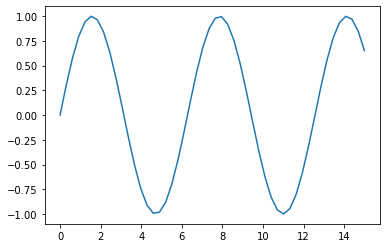

In [6]:
plt.plot(x, y)

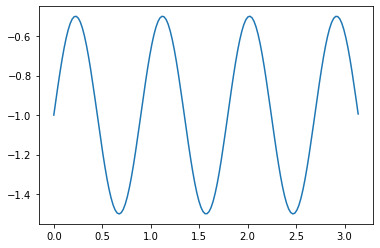

In [7]:
y_lim = 0.5 # Defines max amplitude (wall distance)
num_pts = 5
x = np.linspace(0, 3.14, 150) # Defines how many contact points will we have, 3.14 is full sinusoide wave [1 contact point]
y = y_lim * np.sin((num_pts + 2)*x) - 1
plt.plot(x, y)

In [8]:
def parabola(x, a=1, b=0, c=0): 
    return a*x**2 + b*x + c 

x = np.linspace(-5, 5, 100)
# Parabola without b and c element 
y = parabola(x, 2, 0, 0)

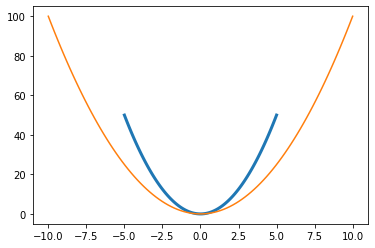

In [9]:
plt.plot(x, y, linewidth=3)
plt.plot(2*x, parabola(2*x))

In [10]:
def poly_f(x, order): 
    return x**order

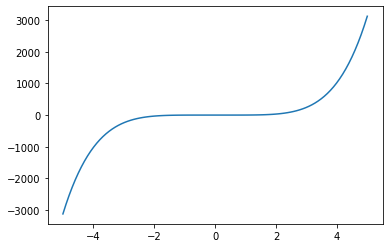

In [11]:
y = poly_f(x, 5)
plt.plot(x, y)

### Bezier? 

Why is bezier different than any kind of polynomials used for any kind of the path parametrization

In [12]:
pts = generate_zig_zag_path(0, 1.0, 10, 0.5)

In [13]:
def quad_bezier(p0, p1, p2, t_min=0, t_max=1): 
    t = np.linspace(t_min, t_max, 100)
    bezier_x = (1-t)*p0[0] + 2*t*(1-t)*p1[0] + t**2*p2[0]
    bezier_y = (1-t)*p0[1] + 2*t*(1-t)*p1[1] + t**2*p2[1]
    return bezier_x, bezier_y

In [14]:
# First one
p0 = cast2np(pts[0, :]) 
p1 = cast2np(pts[1, :]) 
p2 = cast2np(pts[2, :])
# Second one
b0 = cast2np(pts[2, :])
b1 = cast2np(pts[3, :])
b2 = cast2np(pts[4, :])
# Third one
c0 = cast2np(pts[4, :])
c1 = cast2np(pts[5, :])
c2 = cast2np(pts[6, :])
# Fourth one
d0 = cast2np(pts[6, :])
d1 = cast2np(pts[7, :])
d2 = cast2np(pts[8, :])

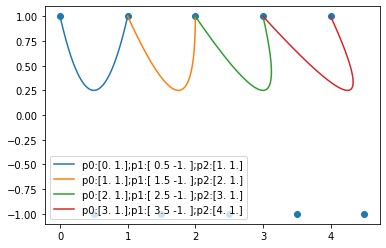

In [15]:
#p1 = p1 + np.array([0, 0.1])
bzr_x, bzr_y = quad_bezier(p0, p1, p2, t_min=0, t_max=1)
#b1 = b1 + np.array([0, 0.05])
pzr_x, pzr_y = quad_bezier(b0, b1, b2)
czr_x, czr_y = quad_bezier(c0, c1, c2)
dzr_x, dzr_y = quad_bezier(d0, d1, d2)
plt.figure()
plt.scatter(pts[:, 0], pts[:, 1])
plt.plot(bzr_x, bzr_y, label=f'p0:{p0};p1:{p1};p2:{p2}')
plt.plot(pzr_x, pzr_y, label=f'p0:{b0};p1:{b1};p2:{b2}')
plt.plot(czr_x, czr_y, label=f'p0:{c0};p1:{c1};p2:{c2}')
plt.plot(dzr_x, dzr_y, label=f'p0:{d0};p1:{d1};p2:{d2}')
plt.legend()
# https://math.umd.edu/~immortal/MATH431/book/ch_bezier.pdf
# Figure out why are they skewed to this point? Hmm... 

In [16]:
print(bzr)

NameError: name 'bzr' is not defined

In [17]:
import yaml

def load_states_from_yaml(yaml_file):
    with open(yaml_file, 'r') as file:
        data = yaml.safe_load(file)
    
    states = []
    for item in data:
        state = {
            'State': item['State'],
            'Position': {
                'x': item['Position'][0],
                'y': item['Position'][1],
                'z': item['Position'][2]
            },
            'Velocity': {
                'x': item['Velocity'][0],
                'y': item['Velocity'][1],
                'z': item['Velocity'][2]
            },
            'Acceleration': {
                'x': item['Acceleration'][0],
                'y': item['Acceleration'][1],
                'z': item['Acceleration'][2]
            }
        }
        states.append(state)
    
    return states

def plot_trajectory(states):
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    titles = ['Position', 'Velocity', 'Acceleration']
    labels = ['X', 'Y', 'Z']

    for i in range(3):  # Iterate over columns (Position, Velocity, Acceleration)
        for j in range(3):  # Iterate over rows (X, Y, Z)
            ax = axs[j, i]
            ax.set_title(f"{titles[i]} {labels[j]}")

            # Extract data for the current subplot
            data = [state[titles[i]][labels[j].lower()] for state in states]

            # Plot the data
            ax.plot(range(len(states)), data, marker='o', linestyle='-', color='b')
            ax.set_xlabel('Time')
            ax.set_ylabel(f'{titles[i]} {labels[j]}')
            
    plt.tight_layout()
    plt.show()
            
def plot_trajectories(states1, states2):
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    titles = ['Position', 'Velocity', 'Acceleration']
    labels = ['X', 'Y', 'Z']

    for i in range(3):  # Iterate over columns (Position, Velocity, Acceleration)
        for j in range(3):  # Iterate over rows (X, Y, Z)
            ax = axs[j, i]
            ax.set_title(f"{titles[i]} {labels[j]}")
            
            # Extract data for the current subplot from the first set of states
            data1 = [state[titles[i]][labels[j].lower()] for state in states1]
            # Extract data for the current subplot from the second set of states
            data2 = [state[titles[i]][labels[j].lower()] for state in states2]

            # Plot the data from the first set of states in blue
            ax.plot(range(len(states1)), data1, marker='o', linestyle='-', color='b', label='Linear')
            # Plot the data from the second set of states in red
            ax.plot(range(len(states2)), data2, marker='o', linestyle='-', color='r', label='Nonlinear')
            
            ax.set_xlabel('Time')
            ax.set_ylabel(f'{titles[i]} {labels[j]}')
            ax.legend()

    plt.tight_layout()
    plt.show()


In [18]:
lin_states = load_states_from_yaml("./lin_opt_states3.yaml")
nonlin_states = load_states_from_yaml("./non_lin_opt_states3.yaml")

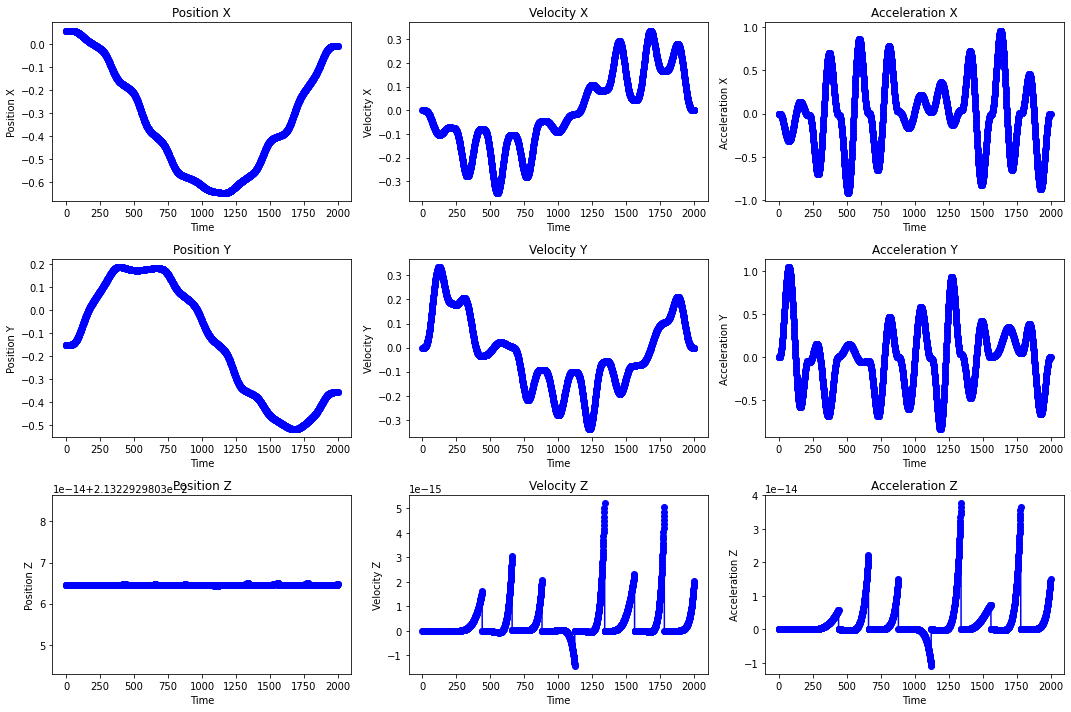

In [19]:
plot_trajectory(nonlin_states)

In [20]:

# Example usage:
# Assuming 'states1' and 'states2' are loaded from the YAML files using load_states_from_yaml method
# plot_trajectory(states1, states2)

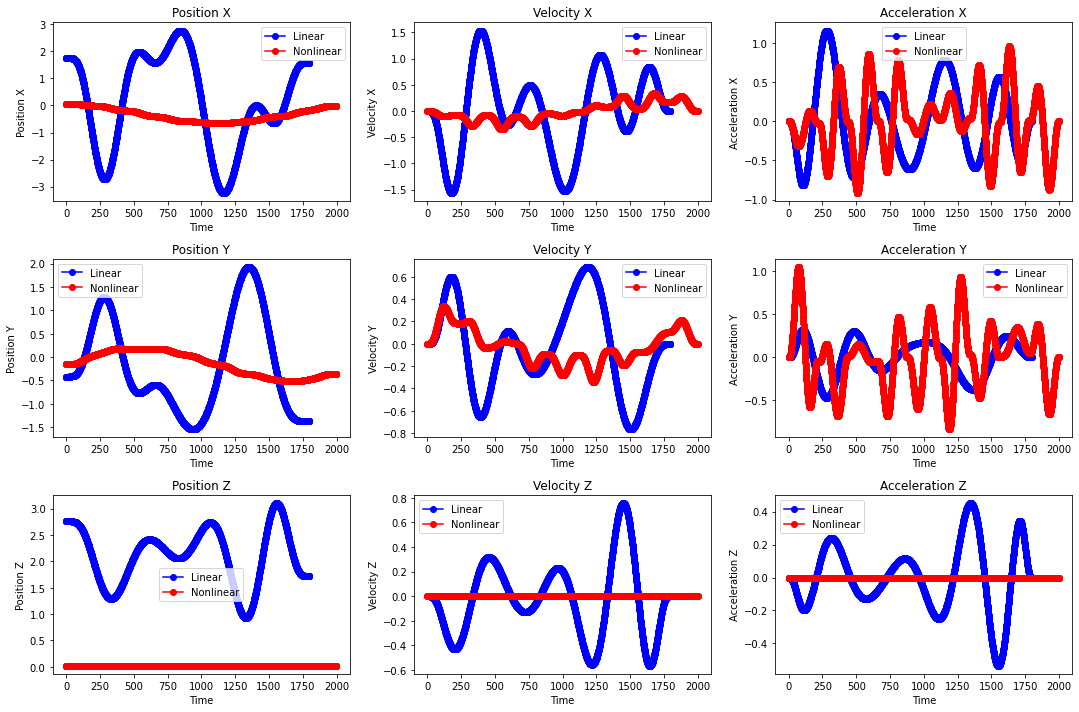

<Figure size 432x288 with 0 Axes>

In [21]:
# NUM ITERATIONS = 1000
plot_trajectories(lin_states, nonlin_states)
plt.savefig("linopt_vs_nonlinopt1.png")

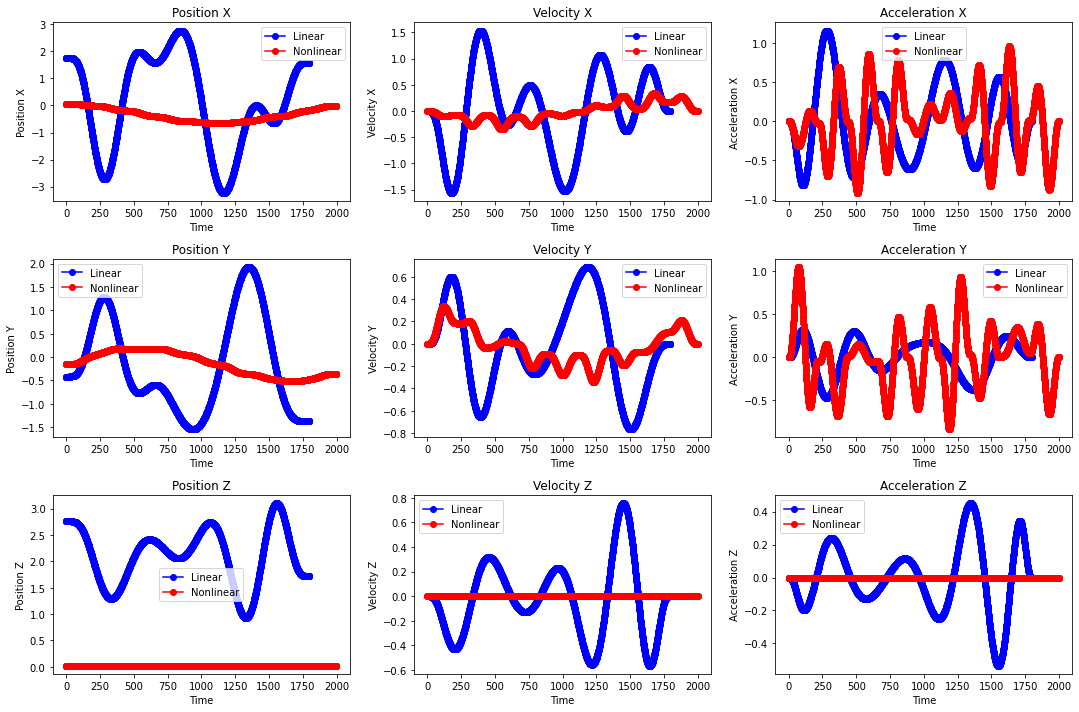

<Figure size 432x288 with 0 Axes>

In [22]:
# NUM_ITERATIONS = 10000
# MAX_CONSTRAINT ACCELERATION
lin_states1 = load_states_from_yaml("./lin_opt_states3.yaml")
nonlin_states1 = load_states_from_yaml("./non_lin_opt_states3.yaml")
plot_trajectories(lin_states1, nonlin_states1)
plt.savefig("linopt_vs_nonlinopt2.png")

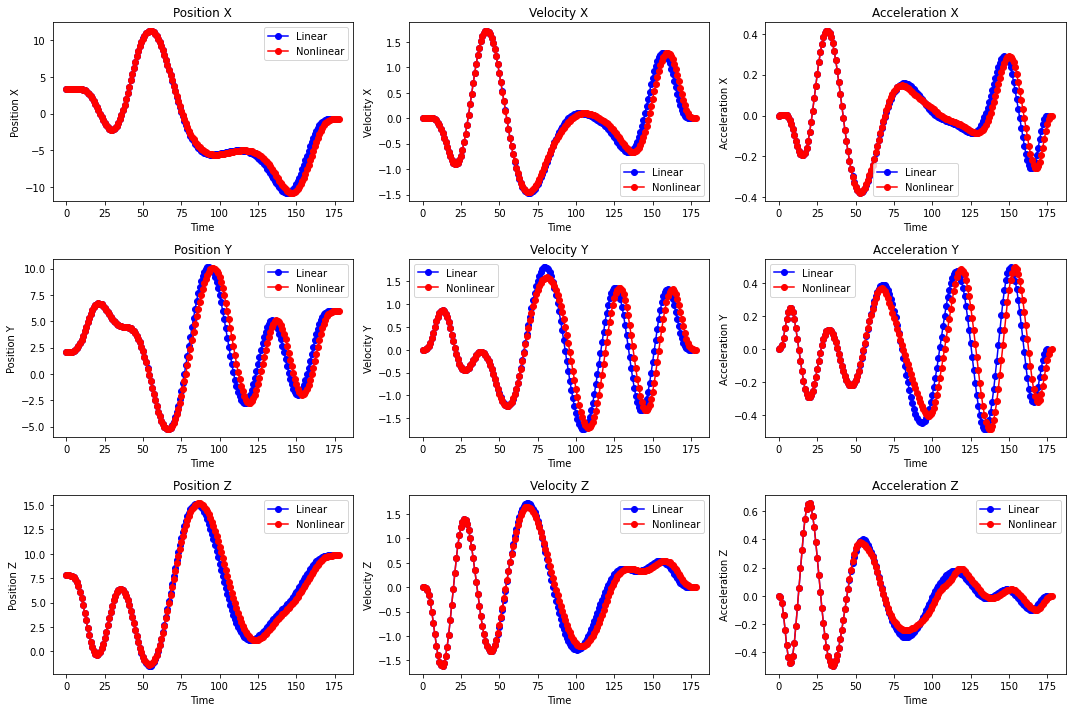

<Figure size 432x288 with 0 Axes>

In [23]:
# NUM_ITERATIONS = 10000
# MAX_CONSTRAINT VELOCITY (IN NONLIN ALSO)
lin_states2 = load_states_from_yaml("./lin_opt_states2.yaml")
nonlin_states2 = load_states_from_yaml("./non_lin_opt_states2.yaml")
plot_trajectories(lin_states2, nonlin_states2)
plt.savefig("linopt_vs_nonlinopt3.png")

[INFO]  Data folder ./bags/circle_tracking already exists. Not creating.
              Topics                      Types  Message Count     Frequency
0  /flynav/curr_odom          nav_msgs/Odometry           4576  76260.072727
1           /pose_in  geometry_msgs/PoseStamped           7719    200.315400


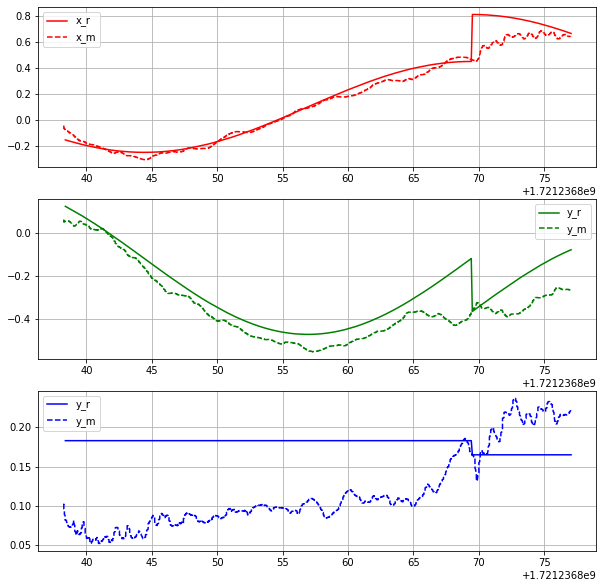

In [24]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt

# Load the bag file
bag = bagreader('./bags/circle_tracking.bag')

# List the available topics in the bag file
print(bag.topic_table)

# Read the specific topic, replace '/poseStamped_topic' with your topic name
pose_data = bag.message_by_topic('/pose_in')
odom_data = bag.message_by_topic('/flynav/curr_odom')

# Load the data into a pandas dataframe
df = pd.read_csv(pose_data)
df_ = pd.read_csv(odom_data)

# Display the dataframe columns to understand what data is available
#print(df.columns)

# Plot the data (for example, plotting position x and y over time)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

ax1.plot(df['Time'], df['pose.position.x'], label='x_r', color='r')
ax1.plot(df_['Time'], df_['pose.pose.position.x'], label='x_m', linestyle='--', color='r')
ax1.legend()
ax1.grid()

ax2.plot(df['Time'], df['pose.position.y'], label='y_r', color='g')
ax2.plot(df_['Time'], df_['pose.pose.position.y'], label='y_m', linestyle='--', color='g')
ax2.legend()
ax2.grid()

ax3.plot(df['Time'], df['pose.position.z'], label='y_r', color='b')
ax3.plot(df_['Time'], df_['pose.pose.position.z'], label='y_m', linestyle='--', color='b')
ax3.legend()
ax3.grid()

## Plotter methods

In [25]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt

def plot_position(bag_path, plot_name=None): 
    
    # Load the bag file
    bag = bagreader(bag_path)

    # Read the specific topic, replace '/poseStamped_topic' with your topic name
    pose_data = bag.message_by_topic('/pose_in')
    odom_data = bag.message_by_topic('/flynav/vio_odom')

    # Load the data into a pandas dataframe
    df = pd.read_csv(pose_data)
    df_ = pd.read_csv(odom_data)

    # Plot the data (for example, plotting position x and y over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    # TODO: Add plot title
    ax1.plot(df['Time'], df['pose.position.x'], label='x_r', color='r')
    ax1.plot(df_['Time'], df_['pose.pose.position.x'], label='x_m', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()

    ax2.plot(df['Time'], df['pose.position.y'], label='y_r', color='g')
    ax2.plot(df_['Time'], df_['pose.pose.position.y'], label='y_m', linestyle='--', color='g')
    ax2.legend()
    ax2.grid()

    ax3.plot(df['Time'], df['pose.position.z'], label='y_r', color='b')
    ax3.plot(df_['Time'], df_['pose.pose.position.z'], label='y_m', linestyle='--', color='b')
    ax3.legend()
    ax3.grid()  
    if plot_name:
        fig.savefig(f'{plot_name}.png')
    
def plot_odometries(bag_path, plot_name=None): 
    
    bag = bagreader(bag_path)
    
    odom1_data = bag.message_by_topic('/flynav/vio_odom')
    odom2_data = bag.message_by_topic('/kalman_scan2map_node/odometry_ros')
    
    df1 = pd.read_csv(odom1_data)
    df2 = pd.read_csv(odom2_data)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(df1['Time'], df1['pose.pose.position.x'], label='xv', color='r')
    ax1.plot(df2['Time'], df2['pose.pose.position.x'], label='xf', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()
    
    ax2.plot(df1['Time'], df1['pose.pose.position.y'], label='yv', color='g')
    ax2.plot(df2['Time'], df2['pose.pose.position.y'], label='yf', linestyle='--',color='g')
    ax2.legend()
    ax2.grid()
    
    ax3.plot(df1['Time'], df1['pose.pose.position.z'], label='zv', color='b')
    ax3.plot(df2['Time'], df2['pose.pose.position.z'], label='zf', linestyle='--',color='b')
    ax3.legend()
    ax3.grid()
    if plot_name:
        fig.savefig(f'{plot_name}.png')
    
def plot_opti_position(bag_path, plot_name=None): 
    # Load the bag file
    bag = bagreader(bag_path)

    # Read the specific topics
    pose_ee = bag.message_by_topic('/mocap_helper/opt_elios_pose')
    pose_uav = bag.message_by_topic('/mocap_helper/opt_ee_pose')

    # Load the data into pandas dataframes
    df_ee = pd.read_csv(pose_ee)
    df_uav = pd.read_csv(pose_uav)

    # Plot the data (for example, plotting position x, y, and z over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(df_uav['Time'], df_uav['pose.position.x'], label='x_uav', color='r')
    ax1.plot(df_ee['Time'], df_ee['pose.position.x'], label='x_ee', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()

    ax2.plot(df_uav['Time'], df_uav['pose.position.y'], label='y_uav', color='g')
    ax2.plot(df_ee['Time'], df_ee['pose.position.y'], label='y_ee', linestyle='--', color='g')
    ax2.legend()
    ax2.grid()

    ax3.plot(df_uav['Time'], df_uav['pose.position.z'], label='z_uav', color='b')
    ax3.plot(df_ee['Time'], df_ee['pose.position.z'], label='z_ee', linestyle='--', color='b')
    ax3.legend()
    ax3.grid()

    plt.show()
    if plot_name: 
        fig.savefig(f'{plot_name}.png')
    
    
    

[INFO]  Data folder ./bags/ground_effect already exists. Not creating.


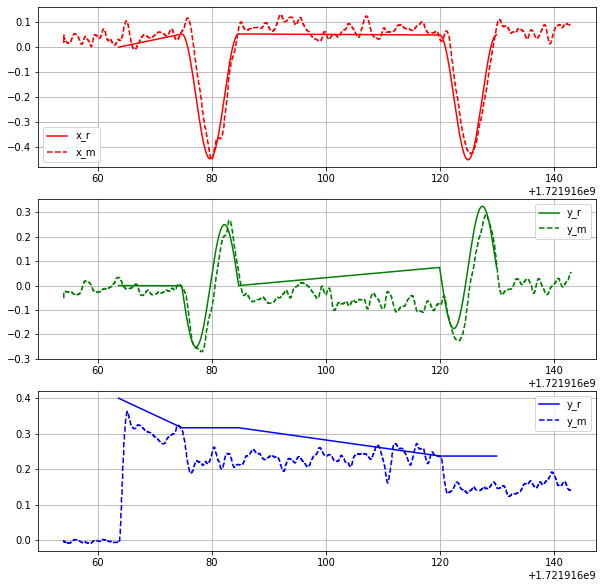

In [26]:
plot_position('./bags/ground_effect.bag', "ground_effect")

## Comments and observations: 

No I term currently. Rope can induce disturbance. Ground effect can induce dusturbance. 


[INFO]  Data folder ./bags/square_circle already exists. Not creating.
[INFO]  Data folder ./bags/square_circle already exists. Not creating.


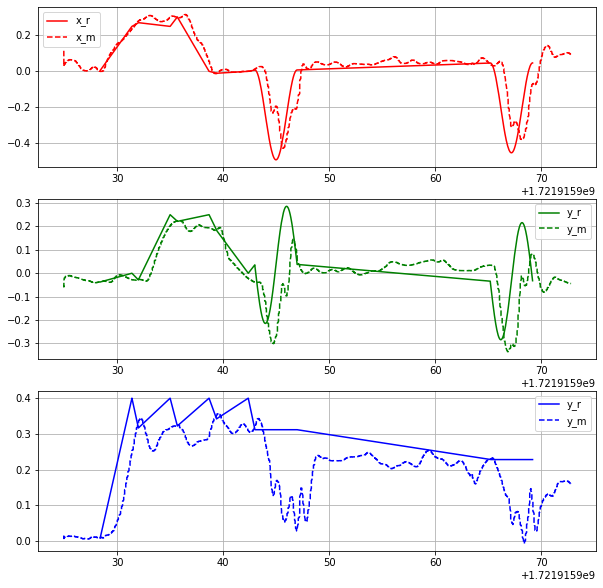

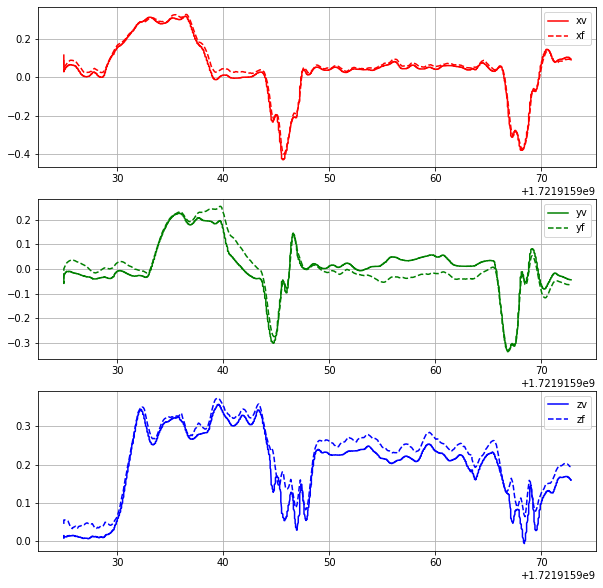

In [27]:
plot_position('./bags/square_circle.bag', 'square_circle')
plot_odometries('./bags/square_circle.bag', 'compare_odometries')

[INFO]  Data folder ./bags/ground_effect already exists. Not creating.
[INFO]  Data folder ./bags/ground_effect already exists. Not creating.


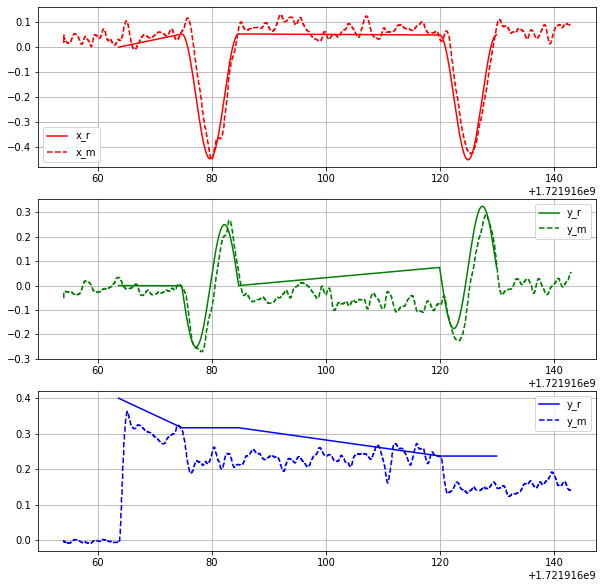

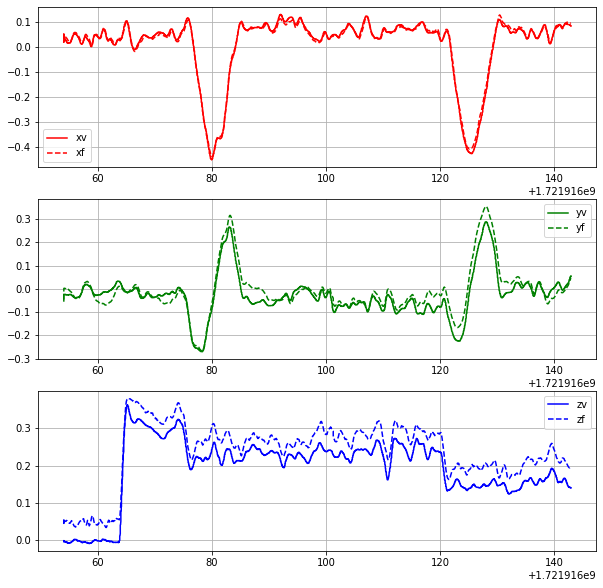

In [28]:
plot_position('./bags/ground_effect.bag')
plot_odometries('./bags/ground_effect.bag')

[INFO]  Data folder ./bags/aerial_manip already exists. Not creating.


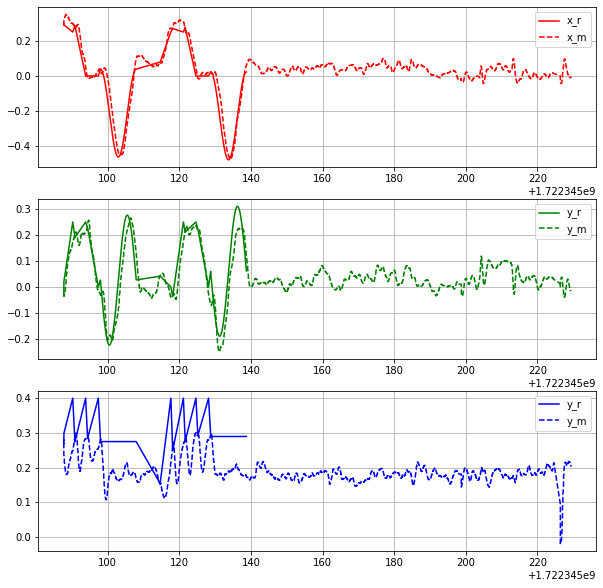

In [29]:
plot_position('./bags/aerial_manip.bag')


[INFO]  Data folder ./bags/mocap1 already exists. Not creating.


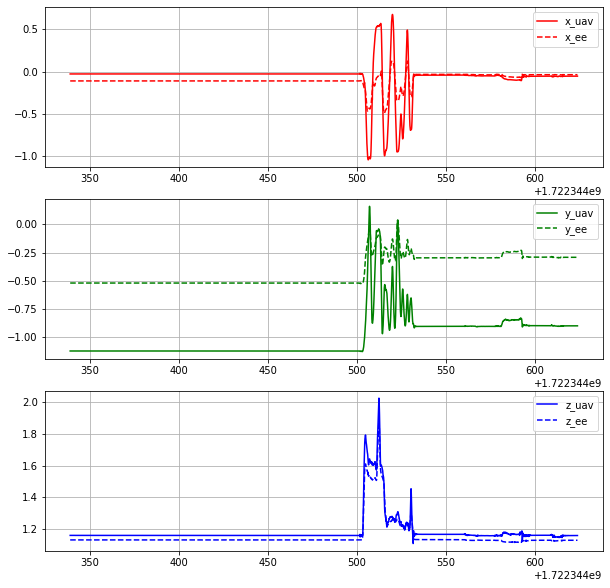

[INFO]  Data folder ./bags/mocap2 already exists. Not creating.


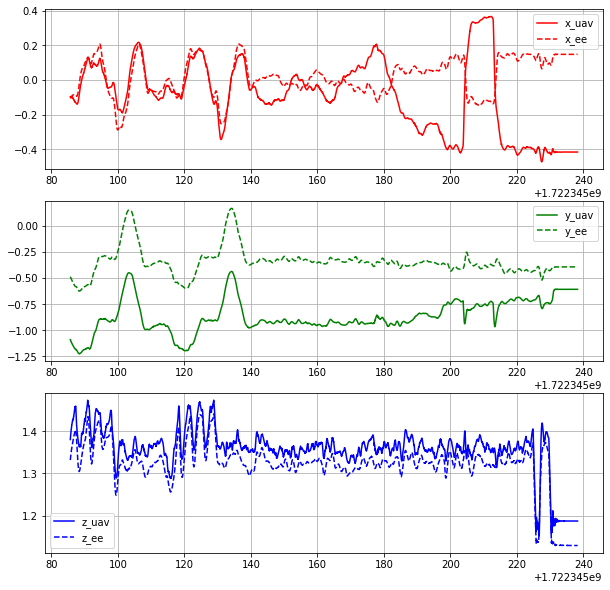

[INFO]  Data folder ./bags/mocap3 already exists. Not creating.


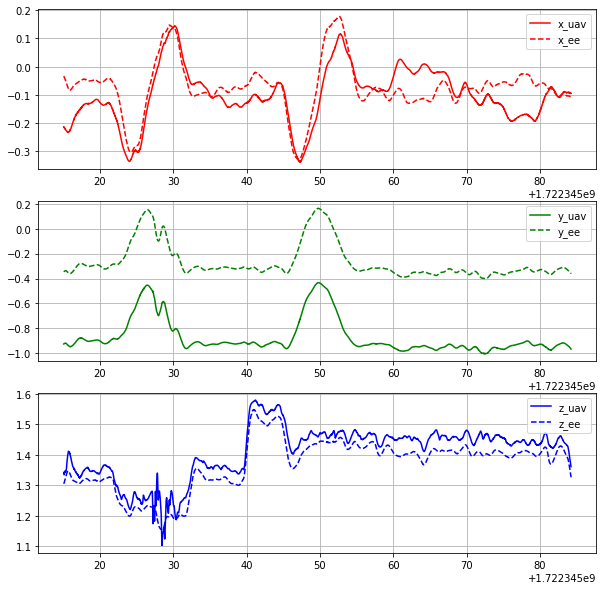

In [30]:
plot_opti_position('./bags/mocap1.bag', 'mocap1')
plot_opti_position('./bags/mocap2.bag', 'mocap2')
plot_opti_position('./bags/mocap3.bag', 'mocap3')

## Plotting methods 

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as Rot
from bagpy import bagreader
import numpy as np

def plot_opti_position(bag_path): 
    # Load the bag file
    bag = bagreader(bag_path)

    # Read the specific topics
    pose_ee = bag.message_by_topic('/mocap_helper/opt_elios_pose')
    pose_uav = bag.message_by_topic('/mocap_helper/opt_ee_pose')

    # Load the data into pandas dataframes
    df_ee = pd.read_csv(pose_ee)
    df_uav = pd.read_csv(pose_uav)

    # Plot the data (for example, plotting position x, y, and z over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(df_uav['Time'], df_uav['pose.position.x'], label='x_uav', color='r')
    ax1.plot(df_ee['Time'], df_ee['pose.position.x'], label='x_ee', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()

    ax2.plot(df_uav['Time'], df_uav['pose.position.y'], label='y_uav', color='g')
    ax2.plot(df_ee['Time'], df_ee['pose.position.y'], label='y_ee', linestyle='--', color='g')
    ax2.legend()
    ax2.grid()

    ax3.plot(df_uav['Time'], df_uav['pose.position.z'], label='z_uav', color='b')
    ax3.plot(df_ee['Time'], df_ee['pose.position.z'], label='z_ee', linestyle='--', color='b')
    ax3.legend()
    ax3.grid()

    plt.show()
    
def plot_opti_position_and_estimate(bag_path, T_, plot_name=None): 
    # Load the bag file
    bag = bagreader(bag_path)

    # Read the specific topics
    pose_ee = bag.message_by_topic('/mocap_helper/opt_elios_pose')
    pose_uav = bag.message_by_topic('/mocap_helper/opt_ee_pose')

    # Load the data into pandas dataframes
    df_ee = pd.read_csv(pose_ee)
    df_uav = pd.read_csv(pose_uav)
    
    x,y,z,qx,qy,qz,qw = extract_odom(df_uav)
    T_uav = create_T_list(x, y, z, qx, qy, qz, qw)
    x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)
    newT_ = []
    for T in T_uav:
        newT = np.matmul(T, np.linalg.inv(T_))
        newT_.append(newT)
        
    x_ = [T_[0, 3] for T_ in newT_]
    y_ = [T_[1, 3] for T_ in newT_]
    z_ = [T_[2, 3] for T_ in newT_] 

    # Plot the data (for example, plotting position x, y, and z over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(df_uav['Time'], df_uav['pose.position.x'], label='x_uav', color='r')
    ax1.plot(df_ee['Time'], df_ee['pose.position.x'], label='x_ee', linestyle='--', color='r')
    ax1.plot(df_uav['Time'], x_, label='x_est')
    ax1.legend()
    ax1.grid()

    ax2.plot(df_uav['Time'], df_uav['pose.position.y'], label='y_uav', color='g')
    ax2.plot(df_ee['Time'], df_ee['pose.position.y'], label='y_ee', linestyle='--', color='g')
    ax2.plot(df_uav['Time'], y_, label='y_est')
    ax2.legend()
    ax2.grid()

    ax3.plot(df_uav['Time'], df_uav['pose.position.z'], label='z_uav', color='b')
    ax3.plot(df_ee['Time'], df_ee['pose.position.z'], label='z_ee', linestyle='--', color='b')
    ax3.plot(df_uav['Time'], z_, label='z_est')
    ax3.legend()
    ax3.grid()

    if plot_name: 
        plt.savefig(f'{plot_name}.png')
    plt.show()
    
def plot_opti_3d():  

    # Create a 3D scatter plot
    fig_3d = plt.figure(figsize=(10, 10))
    ax_3d = fig_3d.add_subplot(111, projection='3d')

    ax_3d.scatter(df_uav['pose.position.x'], df_uav['pose.position.y'], df_uav['pose.position.z'], c='r', label='uav')
    ax_3d.scatter(df_ee['pose.position.x'], df_ee['pose.position.y'], df_ee['pose.position.z'], c='b', label='ee')

    ax_3d.set_xlabel('X Position')
    ax_3d.set_ylabel('Y Position')
    ax_3d.set_zlabel('Z Position')
    ax_3d.legend()
    ax_3d.grid()
    
def plot_p(x, y, z):
    plt.figure(figsize=(10, 4))
    
    # Plot x, y, z
    plt.plot(x, color='red', label='x position')
    plt.plot(y, color='green', label='y position')
    plt.plot(z, color='blue', label='z position')
    
    # Add grid
    plt.grid(True)
    
    # Add labels and title
    plt.xlabel('Time (or Index)')
    plt.ylabel('Position')
    plt.title('Position vs. Time/Index')
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()
    
def plot_rot(T):
    roll_, pitch_, yaw_ = [], [], []
    for T_ in T: 
        R = T_[:3, :3]
        r =  Rot.from_matrix(R)
        angles = r.as_euler("zyx", degrees=False)
        roll_.append(angles[2])
        pitch_.append(angles[1])
        yaw_.append(angles[0])
    plt.figure(figsize=(10, 4))
    plt.plot(roll_, label='roll', color='r')
    plt.plot(pitch_, label='pitch', color='g')
    plt.plot(yaw_, label='yaw', color='b')
    # Add labels and title
    plt.xlabel('Sample')
    plt.ylabel('Angle')
    plt.title('Roll, pitch, and yaw vs time')
    plt.legend()
    plt.grid()
    
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def plot_rmse_and_stats(df_ee, x_rmse, y_rmse, z_rmse, n=0):
    """
    Plots RMSE over time in a 3x2 grid. The first column contains line plots of 
    RMSE values, and the second column contains bar charts displaying the mean 
    and standard deviation of these RMSE values.

    The second column is narrower, with a 3:1 width ratio compared to the first column.
    
    Parameters:
    - df_ee: DataFrame containing the 'Time' column.
    - x_rmse, y_rmse, z_rmse: Arrays or lists containing RMSE values for x, y, and z axes.
    - n: Starting index for plotting (default is 0).
    """
    # Create a figure with custom GridSpec to control column widths
    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(3, 2, width_ratios=[3, 1], figure=fig)

    # First row: x_rmse line plot
    x_max = np.max(x_rmse)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(df_ee['Time'][n:], x_rmse, label='x_rmse', color='red')
    ax1.set_title(f'x_rmse vs Time (Max: {x_max:.2f})')
    ax1.grid(True)
    ax1.legend()

    # First row: x_rmse bar chart with mean and std deviation
    x_mean = np.mean(x_rmse)
    x_std = np.std(x_rmse)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.bar(['Mean'], [x_mean], yerr=[x_std], color='red', capsize=5)
    ax2.set_title(f'x_rmse mean/dev')
    ax2.set_ylim([0, x_max * 1.1])

    # Second row: y_rmse line plot
    y_max = np.max(y_rmse)
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.plot(df_ee['Time'][n:], y_rmse, label='y_rmse', color='green')
    ax3.set_title(f'y_rmse vs Time (Max: {y_max:.2f})')
    ax3.grid(True)
    ax3.legend()

    # Second row: y_rmse bar chart with mean and std deviation
    y_mean = np.mean(y_rmse)
    y_std = np.std(y_rmse)
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.bar(['Mean'], [y_mean], yerr=[y_std], color='green', capsize=5)
    ax4.set_title(f'y_rmse mean/dev')
    ax4.set_ylim([0, y_max * 1.1])

    # Third row: z_rmse line plot
    z_max = np.max(z_rmse)
    ax5 = fig.add_subplot(gs[2, 0])
    ax5.plot(df_ee['Time'][n:], z_rmse, label='z_rmse', color='blue')
    ax5.set_title(f'z_rmse vs Time (Max: {z_max:.2f})')
    ax5.grid(True)
    ax5.legend()

    # Third row: z_rmse bar chart with mean and std deviation
    z_mean = np.mean(z_rmse)
    z_std = np.std(z_rmse)
    ax6 = fig.add_subplot(gs[2, 1])
    ax6.bar(['Mean'], [z_mean], yerr=[z_std], color='blue', capsize=5)
    ax6.set_title(f'z_rmse mean/dev')
    ax6.set_ylim([0, z_max * 1.1])

    # Overall title for the entire figure
    fig.suptitle('RMSE p_ee vs p_est and Statistical Summary', fontsize=16)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Show the plot
    plt.savefig('estimate_rms_ee.png')
    plt.show()

In [237]:
# Extract odometry
def extract_odom(odom): 
    x = odom['pose.position.x']
    y = odom['pose.position.y']
    z = odom['pose.position.z']
    qx = odom['pose.orientation.x']
    qy = odom['pose.orientation.y']
    qz = odom['pose.orientation.z']
    qw = odom['pose.orientation.w']
    return x,y,z,qx,qy,qz,qw

def extract_nav_odom(nav_odom): 
    t = nav_odom['Time']
    x = nav_odom['pose.pose.position.x']
    y = nav_odom['pose.pose.position.y']
    z = nav_odom['pose.pose.position.z']
    qx = nav_odom['pose.pose.orientation.x']
    qy = nav_odom['pose.pose.orientation.y']
    qz = nav_odom['pose.pose.orientation.z']
    qw = nav_odom['pose.pose.orientation.w']
    return t, x,y,z,qx,qy,qz,qw
    

# Convert quaternion to the rotational matrix
def quat2rot(q):
    
    x, y, z, w = q
    r = Rot.from_quat([x, y, z, w])
    return r.as_matrix()

def get_yaw_from_rotation_matrix(R):
    """
    Extract the yaw angle from a 3x3 rotation matrix.
    
    Parameters:
    R -- A 3x3 numpy array representing the rotation matrix.
    
    Returns:
    Yaw angle in radians.
    """
    # Extract elements from the rotation matrix
    R11 = R[0, 0]
    R21 = R[1, 0]
    
    # Compute the yaw angle
    yaw = np.arctan2(R21, R11)
    
    return yaw

# Convert extracted odometry to the T
def convT(x,y,z,qx,qy,qz,qw): 
    R = quat2rot((qx, qy, qz, qw))
    p = np.array([x, y, z]).reshape(3, 1)
    T = np.hstack((R, p))
    T = np.vstack((T, np.array([0, 0, 0, 1])))
    return T

# Create list from T
def create_T_list(x, y, z, qx, qy, qz, qw):
    T_list = []
    for x_,y_,z_,qx_,qy_,qz_,qw_ in zip(x,y,z,qx,qy,qz,qw): 
        T_ = convT(x_,y_,z_, qx_,qy_,qz_,qw_)
        T_list.append(T_)
    return T_list

# Invert Ts in the list
def inv_T_list(T_list): 
    invT = []
    for T_ in T_list: 
        invT.append(np.linalg.inv(T_))
    return invT

# Calibrate end effector 
def calibrate_ee(T_uav, T_ee):
    T_list = []
    for T, T_inv in zip(T_ee, inv_T_list(T_uav)):
        T_mut = np.matmul(T_inv, T)
        T_new = np.round(T_mut, 4)
        T_list.append(T_new)
    return T_list

In [154]:
# Load the bag file [Create T_uav, T_ee, and T_calib] lists
def get_Ts(bag_pth): 
    bag = bagreader(bag_pth)

    # Read the specific topic, replace '/poseStamped_topic' with your topic name
    pose_uav = bag.message_by_topic('/mocap_helper/opt_elios_pose')
    pose_ee = bag.message_by_topic('/mocap_helper/opt_ee_pose')
    df_uav = pd.read_csv(pose_uav)
    df_ee = pd.read_csv(pose_ee)

    x,y,z,qx,qy,qz,qw = extract_odom(df_uav)
    x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)

    T_uav = create_T_list(x, y, z, qx, qy, qz, qw)
    T_ee = create_T_list(x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee)
    T_calib = calibrate_ee(T_uav, T_ee)
    return T_uav, T_ee, T_calib

# Rotation matrices average 
def avg_T(T_calib): 
    x_ = [T_[0, 3] for T_ in T_calib]
    y_ = [T_[1, 3] for T_ in T_calib]
    z_ = [T_[2, 3] for T_ in T_calib]
    plot_p(x_, y_, z_)

    x_mean = np.mean(x_)
    y_mean = np.mean(y_)
    z_mean = np.mean(z_)
    p_mean = np.array([x_mean, y_mean, z_mean]).reshape(3, 1)

    T_calib_ = np.hstack((np.eye(3), p_mean))
    T_calib_ = np.vstack((T_calib_, [0, 0, 0, 1]))
    return T_calib_

def get_est(T_uav, T_): 
    newT_ = []
    for Tu in T_uav:
        newT = np.matmul(Tu, T_)
        newT_.append(newT)
        
    x_ = [T_[0, 3] for T_ in newT_]
    y_ = [T_[1, 3] for T_ in newT_]
    z_ = [T_[2, 3] for T_ in newT_] 
    
    return x_, y_, z_
    

Pose of the elios in the world (optitrack frame is described as): 
$$T_{W}^{B} $$

Pose of the end effector in the world frame is described as: 
$$T_{W}^{ee}$$

Pose of the end effector in the base frame is described as: 
$$T_{B}^{ee} = T_{B}^{W}T_{W}^{ee} = (T_{W}^{B})^{-1}T_{W}^{ee}$$ 

## Few operational problems: 

- Optitrack and Flyability are on the same network, hence it is hard to collect and use data simultaneously
- T_ee_B changes depending on the measurements because of the optitrack collection routine, now it should be fine :)



[INFO]  Data folder ./bags/mocap6_rotation already exists. Not creating.
[INFO]  Data folder ./bags/mocap6_rotation already exists. Not creating.


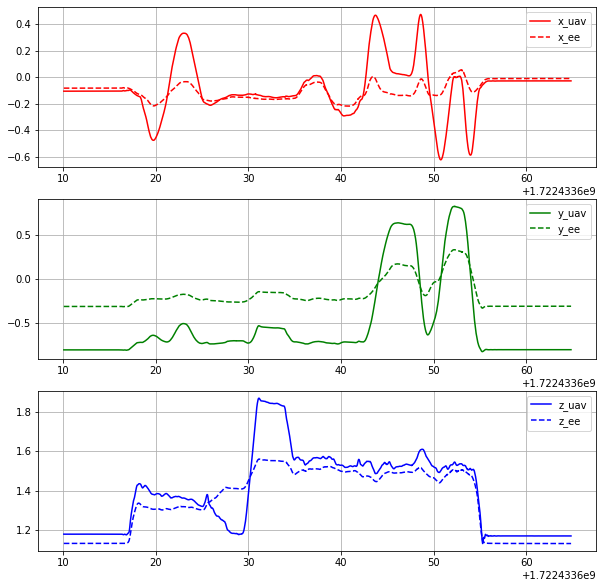

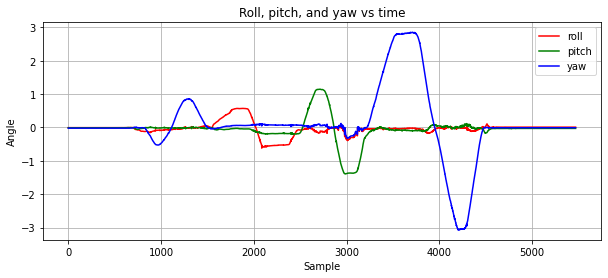

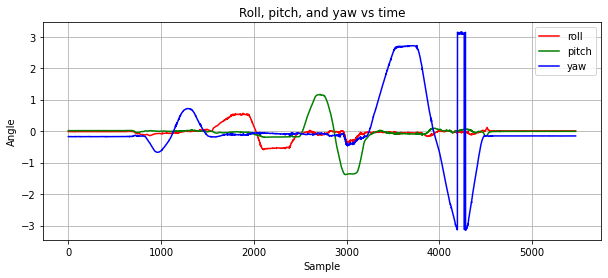

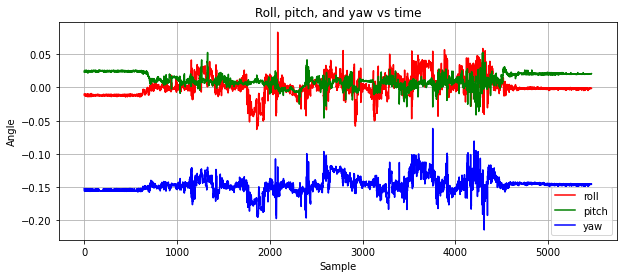

In [41]:
#plot_odometries('./bags/aerial_manip.bag')
T_uav, T_ee, T_calib = get_Ts('./bags/mocap6_rotation.bag')
plot_opti_position('./bags/mocap6_rotation.bag')
plot_rot(T_uav)
plot_rot(T_ee)
plot_rot(T_calib)

#plot_opti_position('./bags/mocap2.bag')
#plot_p(x_, y_, z_)

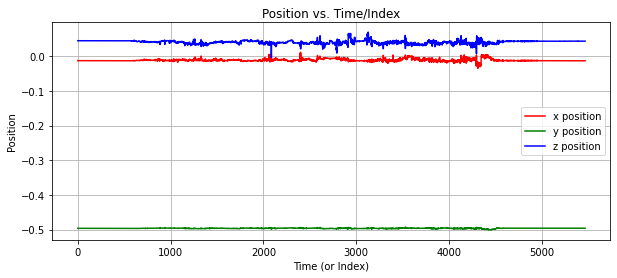

[[ 1.          0.          0.         -0.01116021]
 [ 0.          1.          0.         -0.49647354]
 [ 0.          0.          1.          0.04106445]
 [ 0.          0.          0.          1.        ]]
[INFO]  Data folder ./bags/mocap6_rotation already exists. Not creating.


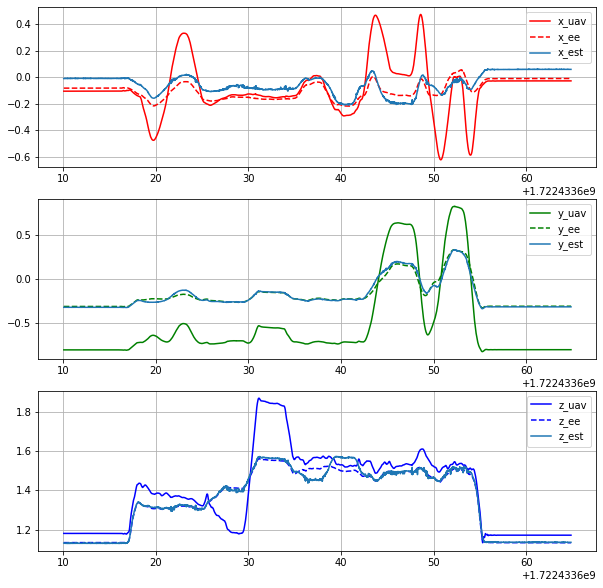

In [42]:
x_ = [T_[0, 3] for T_ in T_calib]
y_ = [T_[1, 3] for T_ in T_calib]
z_ = [T_[2, 3] for T_ in T_calib]
plot_p(x_, y_, z_)

x_mean = np.mean(x_)
y_mean = np.mean(y_)
z_mean = np.mean(z_)
p_mean = np.array([x_mean, y_mean, z_mean]).reshape(3, 1)

T_calib_ = np.hstack((np.eye(3), p_mean))
T_calib_ = np.vstack((T_calib_, [0, 0, 0, 1]))
print(T_calib_)

plot_opti_position_and_estimate('./bags/mocap6_rotation.bag', T_calib_, 'mocap_calib')

## TODO: 
- [x] Compare estimated T with one I have, and make sure it is correct :) it is correct but we need to minimize it :)  
- [ ] Put it in overleaf
- [ ] Clip 
- [ ] Scale time
- [ ] Optimization of the found matrices (across some time horizon) 

## Explore bags

In [ ]:
import os
os.listdir("./bags")

In [ ]:
plot_odometries('./bags/mocap_hend_uav.bag')


In [ ]:
T_calib = getTcalib('./bags/mocap_hand.bag')

## Averaging rotation matrice: 

- https://www.mathworks.com/matlabcentral/answers/1996053-averaging-rotation-matrices-and-calculating-the-variability
- https://mtaylor.web.unc.edu/wp-content/uploads/sites/16915/2018/04/RAVG.pdf

In [ ]:
plot_opti_position_and_estimate('./bags/mocap_hand.bag', T_calib_)

[INFO]  Data folder ./bags/hand_mocap_comparison already exists. Not creating.


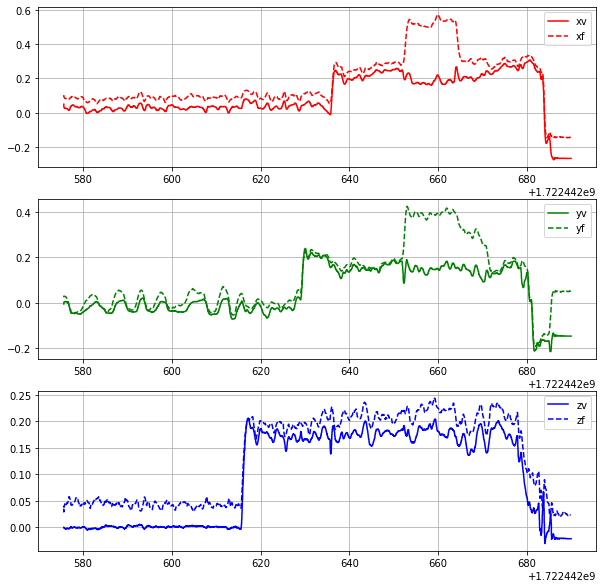

In [194]:
plot_odometries('./bags/hand_mocap_comparison.bag')

[INFO]  Data folder ./bags/hand_mocap_comparison_opti already exists. Not creating.


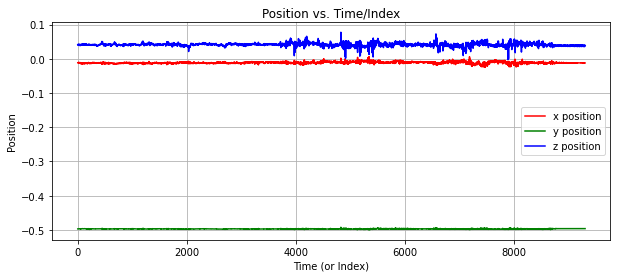

[INFO]  Data folder ./bags/hand_mocap_comparison_opti already exists. Not creating.


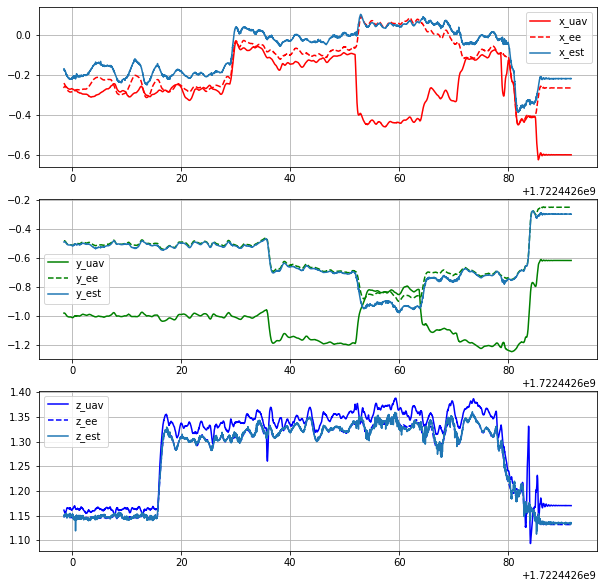

In [189]:
T_uav, T_ee, T_calib_ = get_Ts('./bags/hand_mocap_comparison_opti.bag')
T_calib = avg_T(T_calib_)
plot_opti_position_and_estimate('./bags/hand_mocap_comparison_opti.bag', T_calib)

[INFO]  Data folder ./bags/hand_mocap_comparison_opti already exists. Not creating.


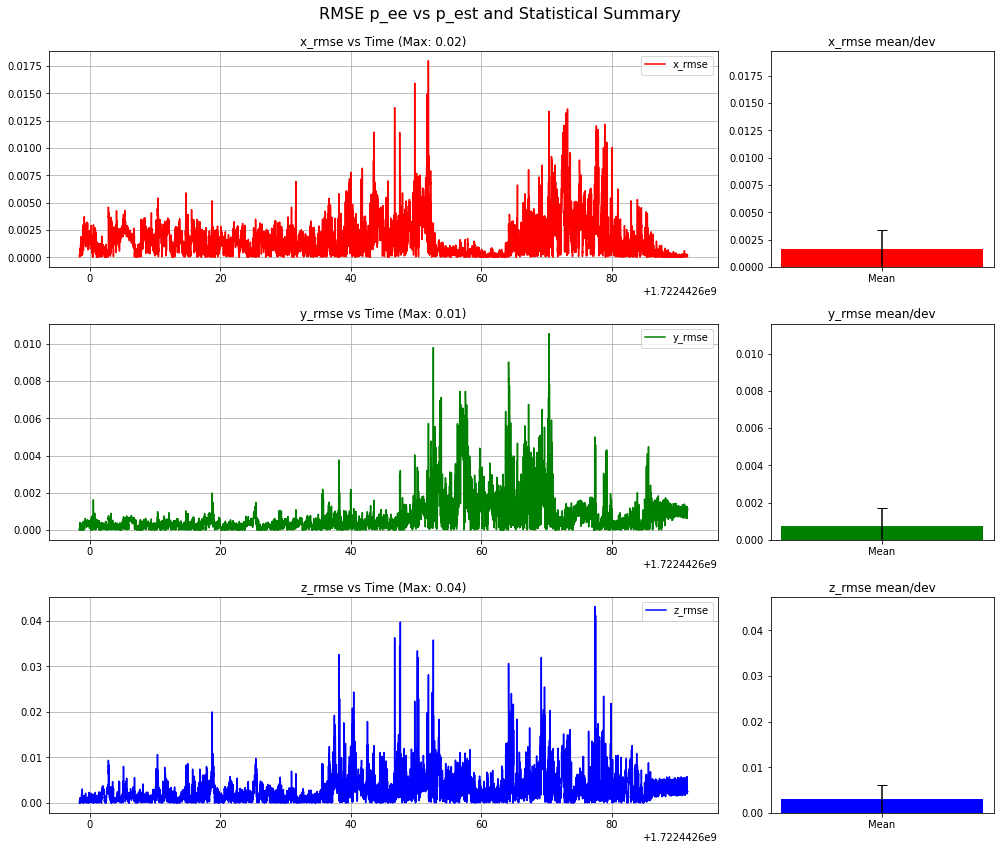

In [196]:
bag = bagreader('./bags/hand_mocap_comparison_opti.bag')
pose_ee = bag.message_by_topic('/mocap_helper/opt_ee_pose')
pose_uav = bag.message_by_topic('/mocap_helper/opt_elios_pose')
df_ee = pd.read_csv(pose_ee)
x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)
x_est, y_est, z_est = get_est(T_uav, T_calib)

x_rmse = rmse(x_ee, x_est)
y_rmse = rmse(y_ee, y_est)
z_rmse = rmse(z_ee, z_est)

x_d = er_diff(x_ee, x_est)
y_d = er_diff(y_ee, y_est)
z_d = er_diff(z_ee, z_est)

#plot_err(df_ee, x_rmse, y_rmse, z_rmse)
#plot_err(df_ee, x_d, y_d, z_d)
plot_rmse_and_stats(df_ee, x_rmse, y_rmse, z_rmse)

In [162]:
def rmse(x_ee, x_est): 
    return [np.sqrt((x_ - x_est_)**2) for x_, x_est_ in zip(x_ee.to_list(), x_est)]
    
def er_diff(x_ee, x_est): 
    return [(x_ - x_est_) for x_, x_est_ in zip(x_ee.to_list(), x_est)]

In [192]:
def plot_err(df_ee, x_err, y_err, z_err): 
    # Create a figure with 3 subplots arranged in a 3x1 grid
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    n = 0
    # First subplot for x_rmse
    axs[0].plot(df_ee['Time'][n:], x_rmse, label='x_rmse', color='red')
    axs[0].set_title('x_rmse vs Time')
    axs[0].grid(True)
    axs[0].legend()

    # Second subplot for y_rmse
    axs[1].plot(df_ee['Time'][n:], y_rmse, label='y_rmse', color='green')
    axs[1].set_title('y_rmse vs Time')
    axs[1].grid(True)
    axs[1].legend()

    # Third subplot for z_rmse
    axs[2].plot(df_ee['Time'][n:], z_rmse, label='z_rmse', color='blue')
    axs[2].set_title('z_rmse vs Time')
    axs[2].grid(True)
    axs[2].legend()

## What can we compare and measure: 

- We can set 3 points that need to be inspected for certain time 
- We can then evaluate different approaches and controllers for inspection 

In [198]:
b0 = bagreader('./bags/flynav_test_uav.bag')
b1 = bagreader('./bags/flynav_test.bag')

[INFO]  Successfully created the data folder ./bags/flynav_test_uav.
[INFO]  Successfully created the data folder ./bags/flynav_test.


In [217]:
b0.topic_table

,Topics,Types,Message Count,Frequency
0,/flyanav/controller/command,elios_ros_msgs/AccelYawrateCommand,9998,45590.260870
1,/flynav/vio_odom,nav_msgs/Odometry,11232,97541.953488
2,/flynav/vio_yaw,std_msgs/Float64,10873,38479.853211
3,/kalman_scan2map_node/odometry_ros,nav_msgs/Odometry,842,9.996172
4,/pose_in,geometry_msgs/PoseStamped,2,0.153431
5,/sensors/imu,sensor_msgs/Imu,16702,127100.121212


In [230]:
flyanav_cmd = b0.message_by_topic('/flyanav/controller/command')
odom_topic = b0.message_by_topic('/flynav/vio_odom')
df_f_cmd = pd.read_csv(flyanav_cmd)
df_uav = pd.read_csv(odom_topic)
print(df_uav)

               Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0      1.722442e+09        1186                185           588643000   
1      1.722442e+09        1187                185           593643000   
2      1.722442e+09        1190                185           608643000   
3      1.722442e+09        1191                185           613643000   
4      1.722442e+09        1192                185           618643000   
...             ...         ...                ...                 ...   
11227  1.722442e+09       17959                269           454740000   
11228  1.722442e+09       17960                269           459740000   
11229  1.722442e+09       17963                269           474740000   
11230  1.722442e+09       17964                269           479740000   
11231  1.722442e+09       17967                269           494740000   

      header.frame_id  child_frame_id  pose.pose.position.x  \
0           local_vio             NaN           

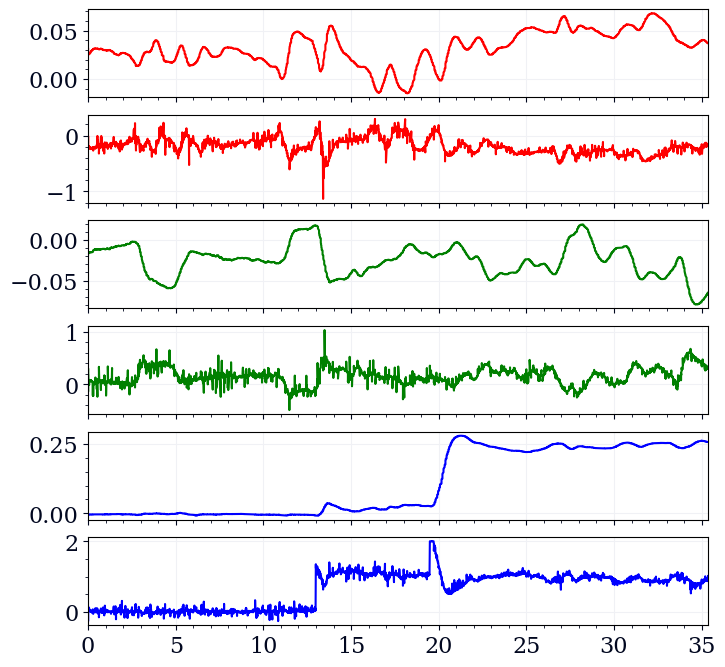

In [264]:
t = df_f_cmd['Time']
t = scale_time(t)
ax = df_f_cmd['acceleration_semibody.x']
ay = df_f_cmd['acceleration_semibody.y']
az = df_f_cmd['acceleration_semibody.z']
yawrate = df_f_cmd['yaw_rate_body']
t_, x, y, z, qx, qy, qz, qw = extract_nav_odom(df_uav)
t_ = scale_time(t_)



it_ = find_closest_index(t, 40); t_ = t_[:it_]; x=x[:it_]; y=y[:it_]; z=z[:it_]
it = find_closest_index(t, 40); t = t[:it]; ax = ax[:it]; ay = ay[:it]; az = az[:it]

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(8, 8), sharex=True)
ax1.plot(t_, x, color='red')
ax1.grid()
ax1.set_xlim(0, max(t_))
ax2.plot(t, ax, color='red')
ax2.grid()
ax2.set_xlim(0, max(t_))
ax3.plot(t_, y, color='green')
ax3.grid()
ax3.set_xlim(0, max(t_))
ax4.plot(t, ay, color='green')
ax4.grid()
ax4.set_xlim(0, max(t_))
ax5.plot(t_, z, color='blue')
ax5.grid()
ax6.plot(t, az-10.81, color='blue')
ax6.grid()



In [224]:
print(odom)

./bags/flynav_test_uav/flynav-vio_odom.csv


In [243]:
print(df_uav['Time']-df_uav['Time'][0])

0         0.000000
1         0.000021
2         0.000031
3         0.000060
4         0.000063
           ...    
11227    83.153357
11228    83.153360
11229    83.153363
11230    83.153369
11231    83.153373
Name: Time, Length: 11232, dtype: float64


In [244]:
def scale_time(time):
    new_t = time-time[0]
    return new_t

In [253]:
def find_closest_index(lst, target):
    # Calculate the difference between each element and the target
    differences = [abs(x - target) for x in lst]
    # Find the index of the smallest difference
    closest_index = differences.index(min(differences))
    return closest_index

In [257]:
print(i)

4929
